In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
cwd = 'C://Users//wowens//PycharmProjects//DataScienceProjects//BreastCancerWisconsin//'
data = pd.read_csv(cwd + 'input//data.csv')

In [9]:
col = data.columns
y = data.diagnosis

In [11]:
list = ['Unnamed: 32','id']
x = data.drop(list,axis=1)
x['diagnosis'] = x['diagnosis'].map({'M':1,'B':0})
x.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


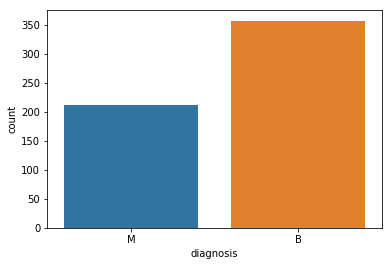

Number of Benign:  357
Number of Malignant:  212


In [12]:
ax = sns.countplot(y,label='Count')
plt.show(ax)
B,M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant: ', M)

In [17]:
train,test = train_test_split(x,test_size = 0.3)

In [18]:
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    
    predictions = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [24]:
predictor_var = ['area_mean', 'concavity_mean', 'area_se', 
                 'concavity_worst','symmetry_worst']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 92.211%


In [28]:
model = DecisionTreeClassifier()
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 99.497%
